# Modeling COVID - 19 in the US With the Gaussian Error Function

In this notebook, we will model the spread of COVID in the United States by using US COVID death data and the Gaussian Error Function.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import src.modeling.gaussian as gaussian
import src.modeling.sir as sir
# import importlib 
# importlib.reload(gaussian)

### Background Information

The Institute for Health Metrics and Evaluation (IHME) published a paper on March 26th, forcasting hospital resource usage and the number of deaths from COVID - 19 in the United States. They used the Gaussian Error Function to model COVID - 19 deaths. The equation and paper can be found below.

Equation: 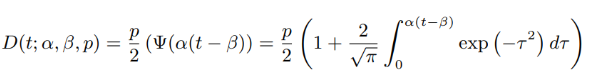

Paper: https://www.medrxiv.org/content/10.1101/2020.03.27.20043752v1.full.pdf+html



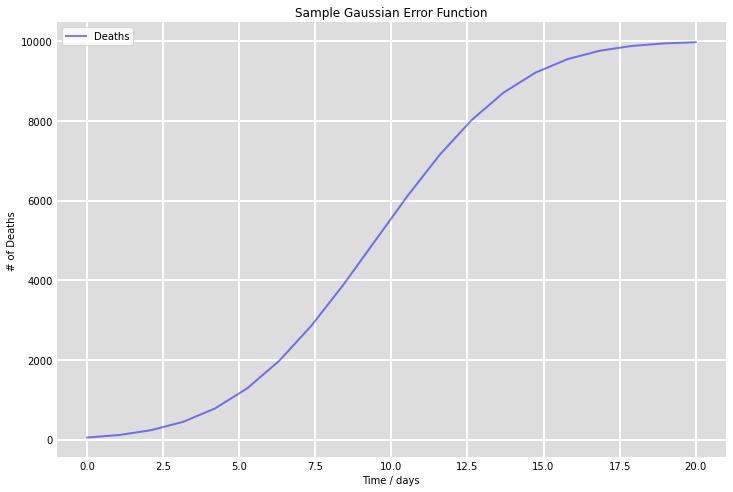

In [2]:
# The comments below indicate how each variable affects the graph
t = np.linspace(0, 20, 20)
a = 0.2 # left / right
b = 10 # slope
p = 10000 # max height

# Returns the y values of the equation between 0 and t 
rate = gaussian.d_rate(a, b, p, 20)

# Graphs the function
fig = gaussian.graph_error_func(t, rate)
plt.show()

By manipulating the variables a, b, and p, we can fit US COVID death data to this equation

### Data

Now, lets look at US COVID death data. Below is time series data of the # of COVID deaths in the US

In [3]:
raw_total_us_deaths = read_csv('data/processed/Gaussian/us_deaths_time_series.csv')

# Get data until June 1st
total_us_deaths = pd.Series(index = raw_total_us_deaths['Unnamed: 0'].values, data = raw_total_us_deaths['0'].values)[:'6/1/20']
total_us_deaths

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
5/28/20    104803
5/29/20    105963
5/30/20    106926
5/31/20    107507
6/1/20     108283
Length: 132, dtype: int64

We can take the first derivative of the time series above to find the COVID death rate in the US

In [4]:
# Timeseries of US deathrate
us_death_rate = total_us_deaths.diff()
us_death_rate

1/22/20       NaN
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
            ...  
5/28/20    1178.0
5/29/20    1160.0
5/30/20     963.0
5/31/20     581.0
6/1/20      776.0
Length: 132, dtype: float64

Since at the beginning of the pandemic, death rates tend to be lower, lets remove the earlier dates from our time series to make sure our model is fit to the most relevant data.

In [5]:
# Shorten timeseries to when it exceeds e^-15 [3/22]
us_death_rate = us_death_rate['3/22/20':]
total_us_deaths = total_us_deaths['3/22/20':]

We can graph the data to get a better picture of what it looks like.

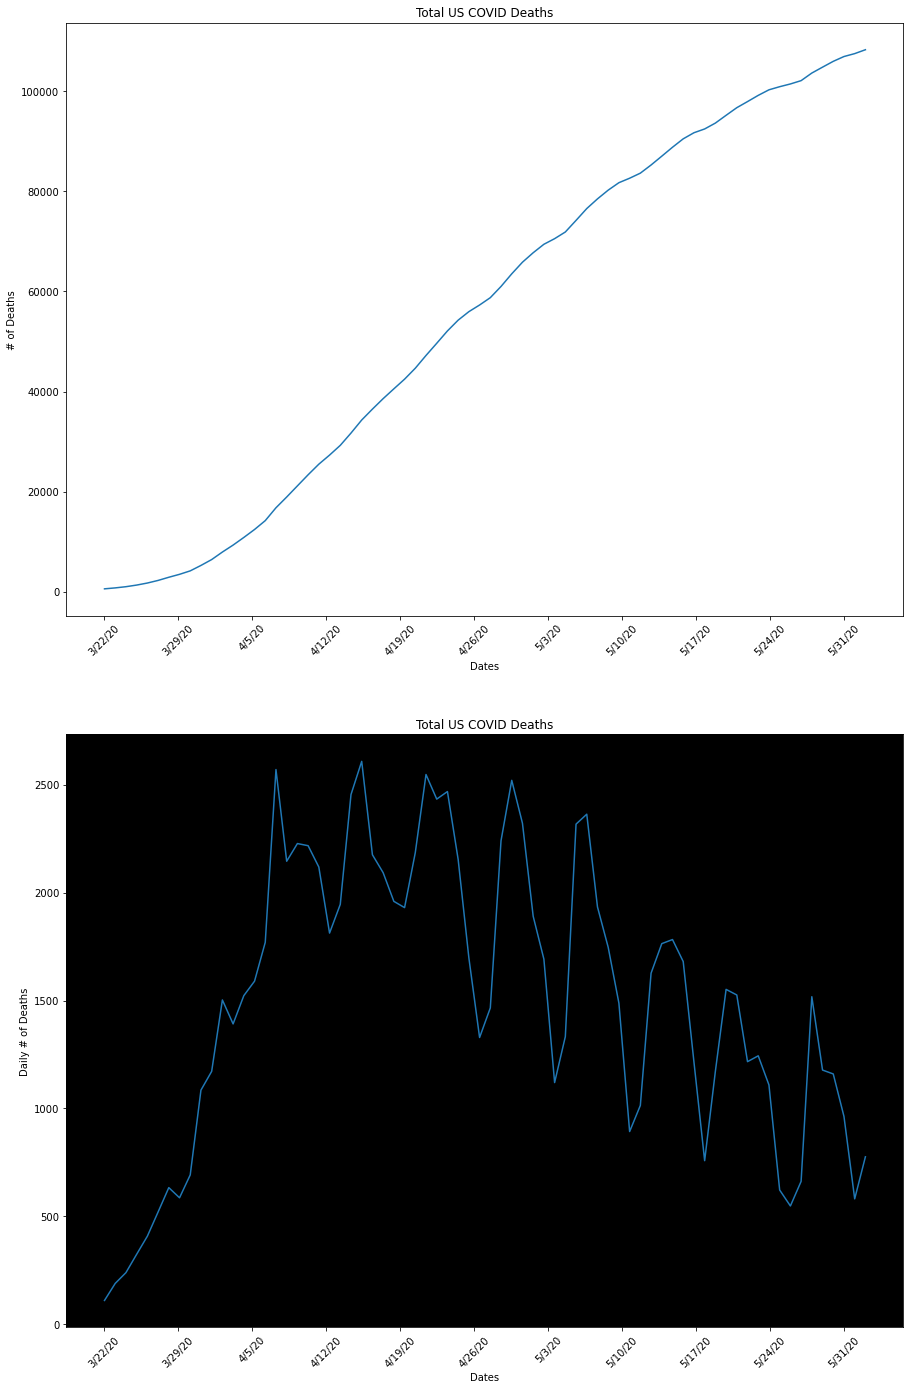

In [6]:
fig = gaussian.graph_death_rate(total_us_deaths, us_death_rate)

### Fit the Model

Now lets fit the data to the model. For this, we will use the scipy.minimize module.

In [7]:
# Find the best values for the equation variables
val, dur = gaussian.scipy_gaus(total_us_deaths)

print("a:", val.x[0], "b:", val.x[1], "p:", val.x[2])

a: 0.03890426737140176 b: 34.77140849033628 p: 106437.06000730355


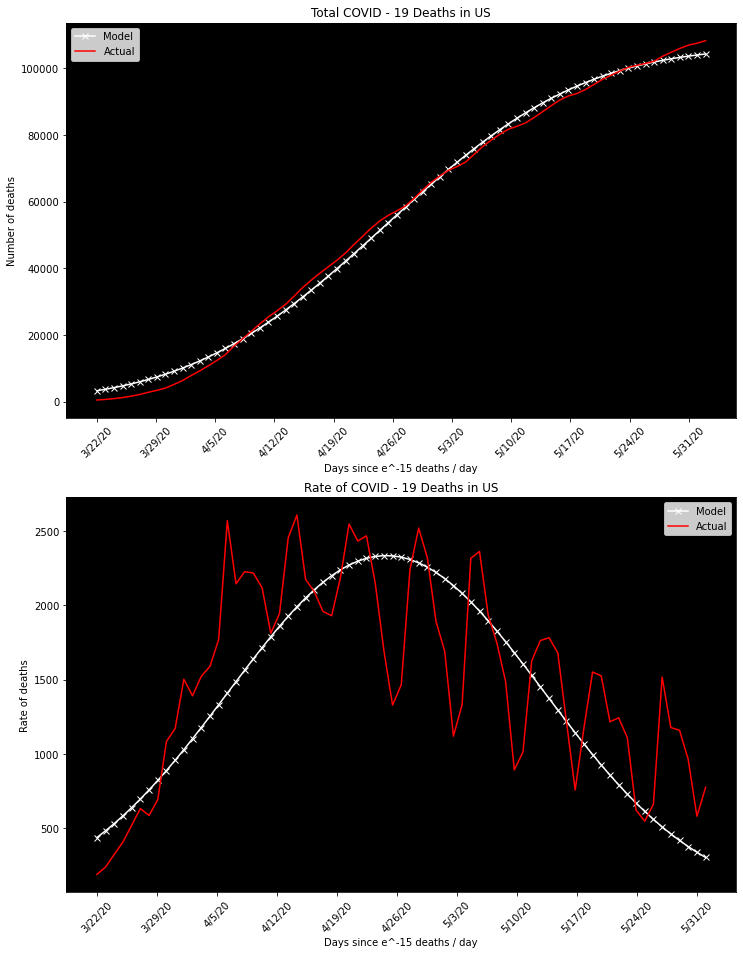

In [8]:
# Get the y values for the equation
final_rate = gaussian.d_rate(val.x[0], val.x[1], val.x[2], dur)

# Graph the model and actual data
gaussian.scipy_gaus_graph(final_rate, total_us_deaths, us_death_rate)

Based on the graphs, the model seems to fit the data pretty well. However, it seems that the model underpredicts the # of deaths in the US in the last week of May while overpredicting the death rate.

### Predict Month of June

Using the following values for a, b, and p, we can make predictions for the month of June.

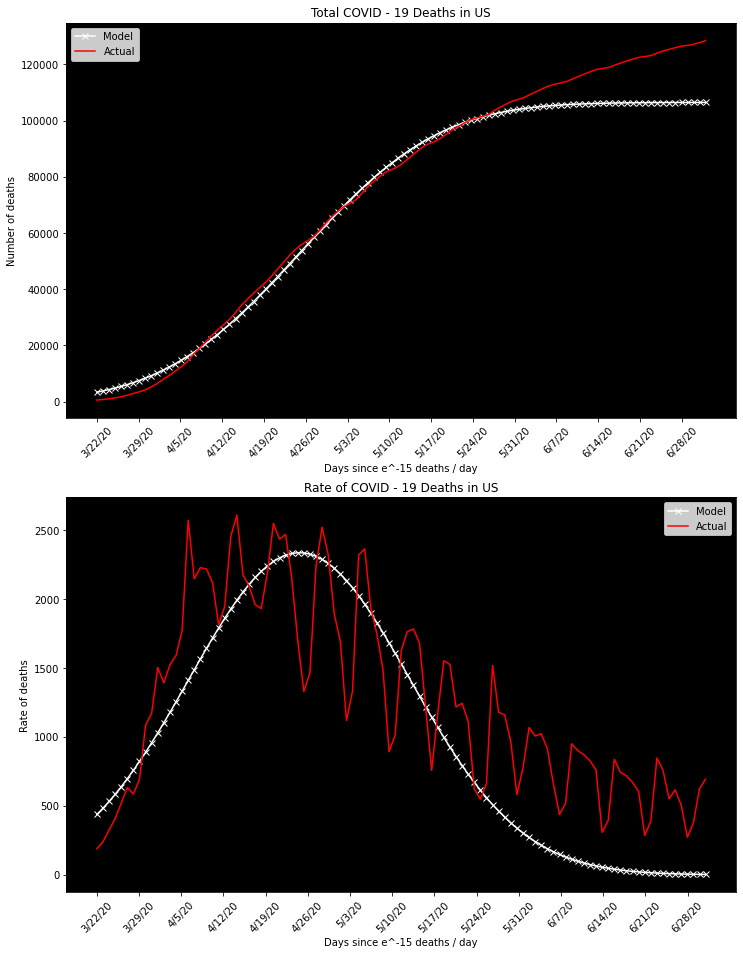

In [9]:
# Add the month of June to US death data
predict_us_deaths = pd.Series(index = raw_total_us_deaths['Unnamed: 0'].values, data = raw_total_us_deaths['0'].values)[:'7/1/20']
predict_us_death_rate = predict_us_deaths.diff()

# Shorten timeseries to when it exceeds e^-15 [3/22]
predict_us_death_rate = predict_us_death_rate['3/22/20':]
predict_us_deaths = predict_us_deaths['3/22/20':]

# Get the y values for the equation
final_rate = gaussian.d_rate(val.x[0], val.x[1], val.x[2], dur + 30)

# Graph the model and actual data
gaussian.scipy_gaus_graph(final_rate, predict_us_deaths, predict_us_death_rate)

### Conclusions

Looking at the graph above, the model underpredicted the number of deaths and death rate in the US.

In [10]:
"""
val, dur = gaussian.scipy_gaus(total_us_deaths)

final_rate = gaussian.d_rate(val.x[0], val.x[1], val.x[2], dur + len(sir.make_dates()))
fig = gaussian.scipy_predict_graph(final_rate, total_us_deaths, us_death_rate, sir.make_dates())

"""

'\nval, dur = gaussian.scipy_gaus(total_us_deaths)\n\nfinal_rate = gaussian.d_rate(val.x[0], val.x[1], val.x[2], dur + len(sir.make_dates()))\nfig = gaussian.scipy_predict_graph(final_rate, total_us_deaths, us_death_rate, sir.make_dates())\n\n'